In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import h5py
import allel

sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/hapBLOCK/IO/")  # hack to get development package first in path
from h5_load import get_coverage,get_genos_pairs,get_idx_iid,get_idx_iid_exact,get_markers_good

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

compute-a-16-111.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


In [2]:
def opp_homos(g1, g2):
    """Return opposing homozygotes"""
    o1 = (g1 == 0) & (g2 == 2)
    o2 = (g1 == 2) & (g2 == 0)
    return (o1 | o2)

def plot_hets(map_het, het, het_c="slateblue", c_roh="seagreen", 
              figsize=(14,2), cm_lim=[], fs = 12,
              alpha=0.3, ms=1, lw = 12, title="", plot=True, min_cm=0, 
              ylabel = f"Opp. Homozygote (y/n)", savepath=""):
    """Plot Heterozygotes against genenetic map,
    plus ROH calls.
    lw: Linewidth of ROH""" 
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    ax1.plot(map_het*100, (het * 1.1 - 0.05), "o", ms=ms, alpha=alpha, zorder=0, color=het_c)
    ax1.set_xlabel("centimorgan", fontsize=fs)
    ax1.set_ylim([-0.1, 1.1])
    
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(np.array([1,0]) * 1.1 - 0.05)
    ax2.set_yticklabels([])
    ax1.set_yticklabels([])

    
    ax2.set_ylabel(ylabel, fontsize=fs*0.8, color=het_c, rotation=270, labelpad=fs)
     
    if len(cm_lim)==2:
        ax1.set_xlim(cm_lim)
        
    if len(title)>0:
        ax1.set_title(title, fontsize=fs)
        
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to: {savepath}")
        #plt.savefig(folder + "posterior_cm.png", bbox_inches = 'tight', pad_inches = 0, dpi=300)
    
    if plot:
        plt.show()  

# Mother Son

In [3]:
f = h5py.File("./data/hdf5/1240k_v43/ch3.h5", "r") # Load for Sanity Check. See below!

j1 = get_idx_iid(f, "SUC002")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "SUC003")
print(get_coverage(f, j2))

0.6312715705970227
0.6782053263277186


In [4]:
g1, g2, m = get_genos_pairs(f, sample1="SUC002", sample2="SUC003", 
                            cutoff=0.98, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.98 GP variants: 0.849x
Filtering to 0.98 GP variants: 0.873x
Filtering to common GP variants: 0.783x


0.0001316352387534143

Saved figure to: ./figs/principle_proof/parent_offspring.png


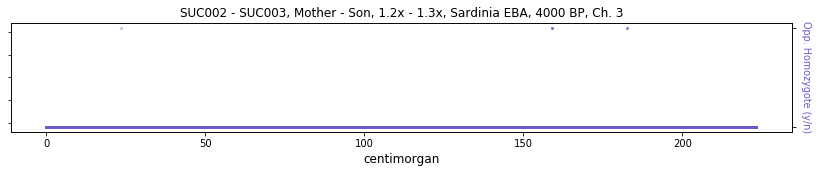

In [5]:
plot_hets(m, o_homos, title="SUC002 - SUC003, Mother - Son, 1.2x - 1.3x, Sardinia EBA, 4000 BP, Ch. 3",
          ms=2, savepath="./figs/principle_proof/parent_offspring.png")

In [12]:
f.close()

# 3rd degree relatives, Punic

In [6]:
j1 = get_idx_iid(f, "I18199")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "I18201")
print(get_coverage(f, j2))

0.38572734765363414
0.3282079019213929


Filtering to 0.98 GP variants: 0.752x
Filtering to 0.98 GP variants: 0.726x
Filtering to common GP variants: 0.609x
Saved figure to: ./figs/villaricos/I18199_I18201_ch6.png


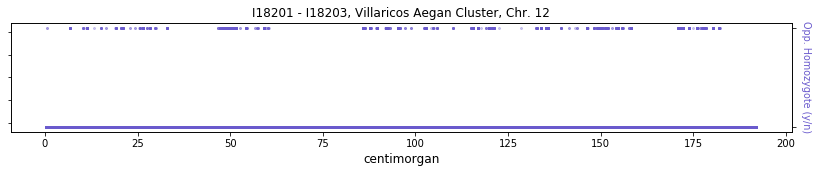

In [34]:
f = h5py.File("./data/hdf5/1240k_v43/ch6.h5", "r") # Load for Sanity Check. See below!

g1, g2, m = get_genos_pairs(f, sample1="I18199", sample2="I18201", 
                            cutoff=0.98, output=True)

o_homos = opp_homos(g1, g2)
np.mean(o_homos)

plot_hets(m, o_homos, title="I18201 - I18203, Villaricos Aegan Cluster, Chr. 12",
          ms=2, savepath="./figs/villaricos/I18199_I18201_ch6.png") # ./figs/villaricos/18199_18203_ch1.png
f.close()

In [9]:
f.close()

# Reference unrelated pair

In [35]:
f = h5py.File("./data/hdf5/1240k_v43/ch6.h5", "r") # Load for Sanity Check. See below!

In [36]:
j1 = get_idx_iid(f, "SUC002")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "SUC008")
print(get_coverage(f, j2))

0.6467510214841176
0.8505733491498616


In [37]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="SUC002", sample2="SUC008", 
                            cutoff=0.98, output=True)

Filtering to 0.98 GP variants: 0.865x
Filtering to 0.98 GP variants: 0.920x
Filtering to common GP variants: 0.818x
CPU times: user 438 ms, sys: 23.6 ms, total: 461 ms
Wall time: 2.01 s


In [38]:
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

0.04652174613661634

Saved figure to: ./figs/principle_proof/unrelated.png


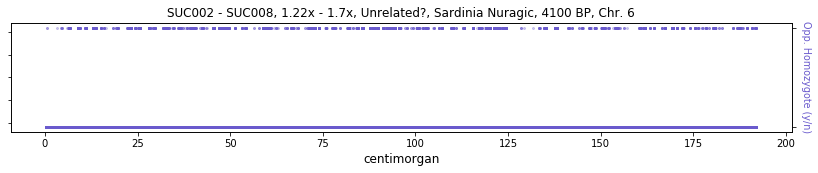

In [39]:
plot_hets(m, o_homos, title="SUC002 - SUC008, 1.22x - 1.7x, Unrelated?, Sardinia Nuragic, 4100 BP, Chr. 6", ms=2,
          savepath="./figs/principle_proof/unrelated.png")

In [40]:
f.close()

### Siblings

In [15]:
f = h5py.File("./data/hdf5/1240k_v43/ch9.h5", "r") # Load for Sanity Check. See below!

In [16]:
j1 = get_idx_iid(f, "COR001")
print(get_coverage(f, j1))
j2 = get_idx_iid(f, "COR002")
print(get_coverage(f, j2))

0.7808182679403174
1.0432718875819058


In [17]:
%%time
g1, g2, m = get_genos_pairs(f, sample1="COR001", sample2="COR002", 
                            cutoff=0.98, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.98 GP variants: 0.874x
Filtering to 0.98 GP variants: 0.915x
Filtering to common GP variants: 0.829x
CPU times: user 682 ms, sys: 102 ms, total: 784 ms
Wall time: 1.25 s


0.016983064573756045

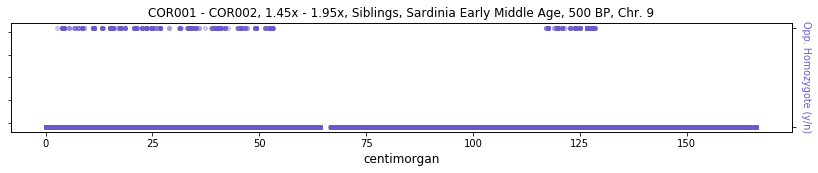

In [18]:
plot_hets(m, o_homos, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 9", ms=4,
          cm_lim=[], savepath="") # ./figs/principle_proof/siblings.png

In [19]:
f.close()

# Different genotypes

In [21]:
%%time
f = h5py.File("./data/hdf5/1240k_v43/ch9.h5", "r") # Load for Sanity Check. See below!
g1, g2, m = get_genos_pairs(f, sample1="COR001", sample2="COR002", 
                            cutoff=0.98, output=True)
diff = (g1!=g2)
#np.mean(g1==2)

Filtering to 0.98 GP variants: 0.874x
Filtering to 0.98 GP variants: 0.915x
Filtering to common GP variants: 0.829x
CPU times: user 618 ms, sys: 90.8 ms, total: 708 ms
Wall time: 833 ms


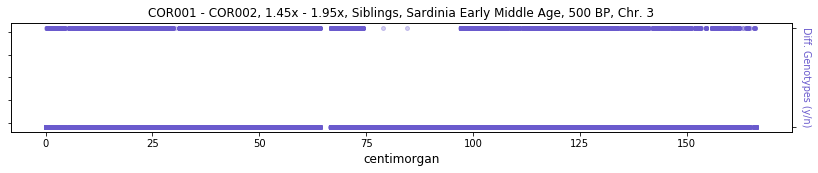

In [22]:
plot_hets(m, diff, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 3", ms=4,
          ylabel = f"Diff. Genotypes (y/n)", savepath="")

### Low Coverage Example

In [68]:
%%time

iid1, iid2 = "Bon001.SG", "ZHJ_BON024.A0101_Luk84"

f = h5py.File("./data/hdf5/1240k_v43/ch1.h5", "r") # Load for Sanity Check. See below!
g1, g2, m = get_genos_pairs(f, sample1=iid1, sample2=iid2, 
                            cutoff=0.99, output=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.99 GP variants: 0.592x
Filtering to 0.99 GP variants: 0.781x
Filtering to common GP variants: 0.535x
CPU times: user 510 ms, sys: 92.1 ms, total: 603 ms
Wall time: 614 ms


0.00043100070527388136

Saved figure to: ./figs/principle_proof/po_anatolia.png


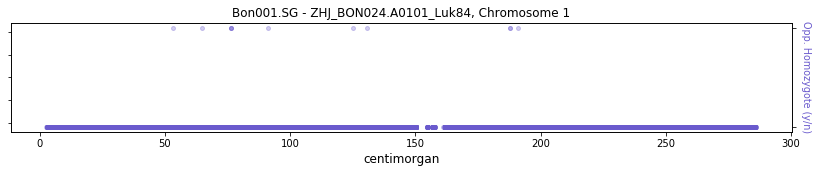

In [71]:
plot_hets(m, o_homos, title="Bon001.SG - ZHJ_BON024.A0101_Luk84, Chromosome 1", ms=4,
          cm_lim=[], savepath="./figs/principle_proof/po_anatolia.png") # ./figs/principle_proof/siblings.png

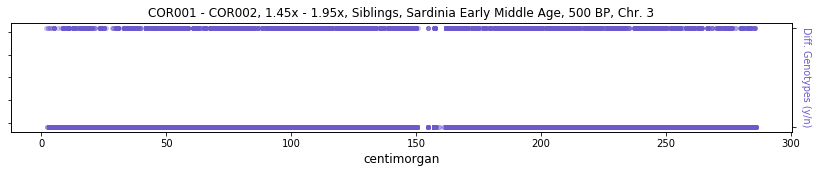

In [57]:
diff = (g1!=g2)

plot_hets(m, diff, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 3", ms=4,
          ylabel = f"Diff. Genotypes (y/n)", savepath="")

# Plot 2nd degree relative inferred PO by opp homo on Chr. 3

In [27]:
%%time
	
iid1, iid2 = "I12407", "I10646"

f = h5py.File("./data/hdf5/1240k_v43/ch3.h5", "r") # Load for Sanity Check. See below!
g1, g2, m = get_genos_pairs(f, sample1=iid1, sample2=iid2, 
                            cutoff=0.99, output=True, exact=True)
o_homos = opp_homos(g1, g2)
np.mean(o_homos)

Filtering to 0.99 GP variants: 0.926x
Filtering to 0.99 GP variants: 0.708x
Filtering to common GP variants: 0.686x
CPU times: user 466 ms, sys: 71.7 ms, total: 538 ms
Wall time: 532 ms


0.00014281123924452855

Saved figure to: ./figs/principle_proof/second_degree_ch3.png


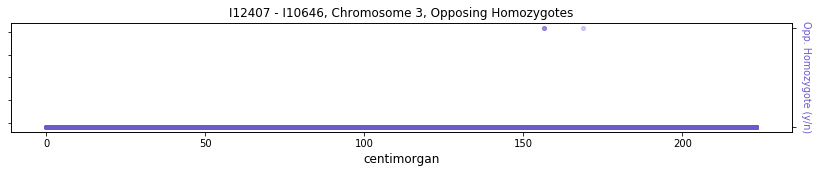

In [28]:
plot_hets(m, o_homos, title="I12407 - I10646, Chromosome 3, Opposing Homozygotes", ms=4,
          cm_lim=[], savepath="./figs/principle_proof/second_degree_ch3.png") # ./figs/principle_proof/siblings.png

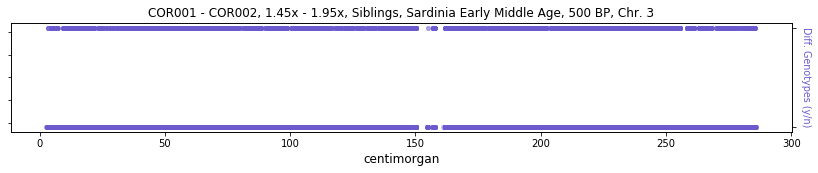

In [22]:
diff = (g1!=g2)

plot_hets(m, diff, title="COR001 - COR002, 1.45x - 1.95x, Siblings, Sardinia Early Middle Age, 500 BP, Chr. 3", ms=4,
          ylabel = f"Diff. Genotypes (y/n)", savepath="")

In [ ]:
get_idx_iid

### Theoretical Expectation

In [253]:
p = f["variants/RAF"][:,0]
c_o_homo = 2 * p * p * (1-p) * (1-p)
np.mean(c_o_homo)

0.05257442

In [37]:
p = f["variants/RAF"][:,0]
np.mean(p*p)

0.14480914